In [4]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier

# GRID SEARCHING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [3]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(True)

In [7]:
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
y_pred = model.predict(X_test)

print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))
print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.2153846153846154
Model precision: 0.3373493975903614
Model f1: 0.26291079812206575
Model accuracy: 0.8772958186791715

CONFUSION MATRIX
[[2189  110]
 [ 204   56]]

key:
 TN   FP 
 FN   TP 


# hidden_layer_sizes

In [60]:
parameter = "hidden_layer_sizes"
values = [(30,),  (30,30),  (30, 30, 30),  (30, 30, 30, 30)]

In [61]:
%%time

ed[parameter] = mf.gridsearching(
        MLPClassifier(),             # Our model
        {parameter: values},        # Values for that parameter
        X_train, y_train
)

CPU times: user 1min 11s, sys: 2.5 s, total: 1min 14s
Wall time: 38.6 s


In [62]:
ed[parameter]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.551419,0.002981,0.241980,1.0,"(30,)",4,0.268398,1.0,0.241071,1.0,0.216450,1.0,0.233088,0.000622,0.021217,0.0
1,2.954963,0.003370,0.260519,1.0,"(30, 30)",1,0.282105,1.0,0.248908,1.0,0.250531,1.0,0.229361,0.000836,0.015283,0.0
2,2.465182,0.003765,0.258395,1.0,"(30, 30, 30)",2,0.224532,1.0,0.267241,1.0,0.283433,1.0,0.093203,0.000595,0.024847,0.0
3,2.160398,0.004384,0.247926,1.0,"(30, 30, 30, 30)",3,0.227181,1.0,0.265560,1.0,0.251046,1.0,0.177295,0.000759,0.015824,0.0


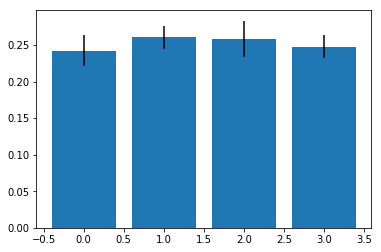

In [65]:
# Plot
plt.bar(range(4), 
        ed[parameter].mean_test_score, 
        yerr=ed[parameter].std_test_score)
plt.show()

# activation

In [32]:
parameter = "activation"
values = ['identity', 'logistic', 'tanh', 'relu']     # default relu

In [33]:
%%time

ed[parameter] = mf.gridsearching(
        MLPClassifier(),             # Our model
        {parameter: values},        # Values for that parameter
        X_train, y_train
)

CPU times: user 1min 44s, sys: 3.18 s, total: 1min 47s
Wall time: 55.2 s


In [34]:
ed[parameter]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activation,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.377932,0.003973,0.119048,0.149926,identity,4,0.150327,0.203612,0.094915,0.146508,0.111888,0.099656,0.038801,0.000429,0.023183,0.042509
1,6.343307,0.007068,0.270199,0.987405,logistic,2,0.285714,0.986408,0.292818,0.989372,0.232044,0.986434,0.341910,0.000676,0.027127,0.001391
2,5.078833,0.010418,0.237798,1.000000,tanh,3,0.204852,1.000000,0.264789,1.000000,0.243767,1.000000,0.328795,0.004170,0.024833,0.000000
3,4.431748,0.004143,0.274774,1.000000,relu,1,0.252874,1.000000,0.287841,1.000000,0.283619,1.000000,0.413739,0.000611,0.015586,0.000000


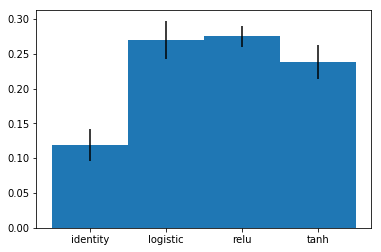

In [36]:
# Plot
plt.bar(values, 
        ed[parameter].mean_test_score, 
        width = 1,
        yerr=ed[parameter].std_test_score)
plt.show()

# solver

In [37]:
parameter = 'solver'
values = ['lbfgs', 'sgd', 'adam']       #default ‘adam’

In [38]:
%%time

ed[parameter] = mf.gridsearching(
        MLPClassifier(),             # Our model
        {parameter: values},         # Values for that parameter
        X_train, y_train
)

CPU times: user 1min 14s, sys: 2.78 s, total: 1min 17s
Wall time: 40.9 s


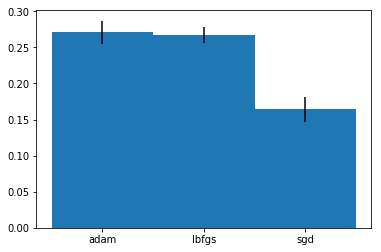

In [39]:
# Plot
plt.bar(values, 
        ed[parameter].mean_test_score, 
        width = 1,
        yerr=ed[parameter].std_test_score)
plt.show()

# alpha

In [49]:
parameter = 'alpha'
values = [10.0**n for n in np.arange(-6, 6)]      # float, optional, default 0.0001

In [50]:
%%time

ed[parameter] = mf.gridsearching(
        MLPClassifier(),             # Our model
        {parameter: values},        # Values for that parameter
        X_train, y_train
)

CPU times: user 4min 33s, sys: 9.38 s, total: 4min 42s
Wall time: 2min 31s


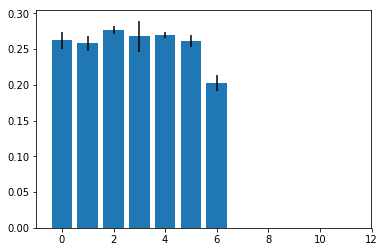

In [58]:
# Plot
plt.bar(range(12) ,
        ed[parameter].mean_test_score, 
        yerr=ed[parameter].std_test_score)
plt.show()

In [59]:
ed[parameter]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.606460,0.004199,0.262137,1.000000,1e-06,4,0.247619,1.000000,0.262774,1.000000,0.276029,1.000000,0.485600,0.000376,0.011607,0.000000
1,4.440868,0.003711,0.258142,1.000000,1e-05,6,0.270880,1.000000,0.245783,1.000000,0.257757,1.000000,0.210147,0.000019,0.010251,0.000000
2,4.543947,0.003701,0.276845,1.000000,0.0001,1,0.268793,1.000000,0.278729,1.000000,0.283019,1.000000,0.332373,0.000021,0.005959,0.000000
3,4.156629,0.003688,0.268133,1.000000,0.001,3,0.270880,1.000000,0.240385,1.000000,0.293144,1.000000,0.329997,0.000011,0.021624,0.000000
4,5.171547,0.005189,0.270358,1.000000,0.01,2,0.264775,1.000000,0.271605,1.000000,0.274699,1.000000,0.087500,0.001590,0.004146,0.000000
5,5.466494,0.005062,0.261802,0.999681,0.1,5,0.251816,1.000000,0.260870,0.999043,0.272727,1.000000,1.022673,0.000655,0.008562,0.000451
6,3.605635,0.012500,0.203138,0.644387,1,7,0.204678,0.670854,0.216049,0.664975,0.188679,0.597333,0.942697,0.007463,0.011226,0.033359
7,1.391445,0.006122,0.000000,0.000000,10,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239408,0.002675,0.000000,0.000000
8,2.543141,0.004985,0.000000,0.000000,100,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162160,0.000920,0.000000,0.000000
9,4.521269,0.004317,0.000000,0.000000,1000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715866,0.000767,0.000000,0.000000
